In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [163]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/interval vs r-r values/second1000.csv")

In [164]:
df.head(1000)

,sno,rrvalues
0,1000,0.780
1,1001,0.782
2,1002,0.795
3,1003,0.792
4,1004,0.813
...,...,...
995,1995,0.781
996,1996,0.791
997,1997,0.749
998,1998,0.693


In [165]:
df.describe()

,sno,rrvalues
count,1000.000000,1000.000000
mean,1499.500000,0.785401
std,288.819436,0.038255
min,1000.000000,0.650000
25%,1249.750000,0.762000
50%,1499.500000,0.786000
75%,1749.250000,0.811000
max,1999.000000,0.885000


In [166]:
df.shape

(1000, 2)

In [167]:
cdf = df[['sno','rrvalues']]
cdf.head(5)

,sno,rrvalues
0,1000,0.780
1,1001,0.782
2,1002,0.795
3,1003,0.792
4,1004,0.813


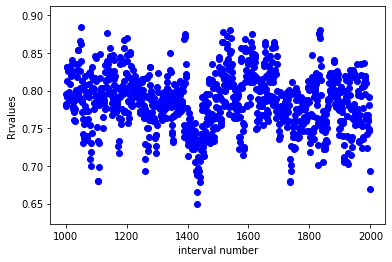

In [168]:
#graph of SNO vs r-r values

plt.scatter(cdf.sno, cdf.rrvalues,color='blue')
plt.xlabel('interval number')
plt.ylabel('Rrvalues')
plt.show()

In [169]:
#splitting our data in 80-20 ratio for regression

In [170]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

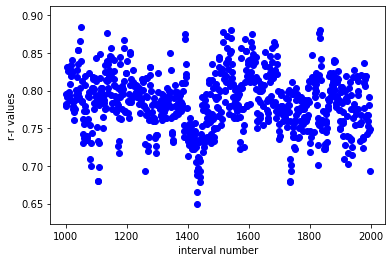

In [171]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.sno, train.rrvalues,  color='blue')
plt.xlabel("interval number")
plt.ylabel("r-r values")
plt.show()

In [172]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['sno']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-1.1811577e-05]]
Intercept:  [0.80223906]


Text(0, 0.5, 'r-r values')

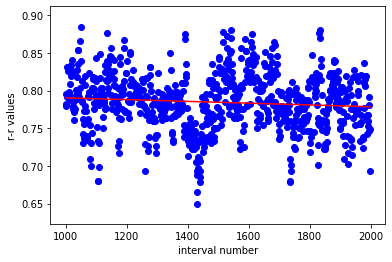

In [173]:
plt.scatter(train.sno, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("interval number")
plt.ylabel("r-r values")

In [174]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['sno']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -127.69


In [175]:
#using polynomial regression

In [176]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['sno']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['sno']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000000e+00, 1.000000e+03, 1.000000e+06],
       [1.000000e+00, 1.001000e+03, 1.002001e+06],
       [1.000000e+00, 1.002000e+03, 1.004004e+06],
       ...,
       [1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 1.997000e+03, 3.988009e+06],
       [1.000000e+00, 1.998000e+03, 3.992004e+06]])

In [177]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -7.69606785e-05  2.17839862e-08]]
Intercept:  [0.84912822]


Text(0, 0.5, 'r-rvalues')

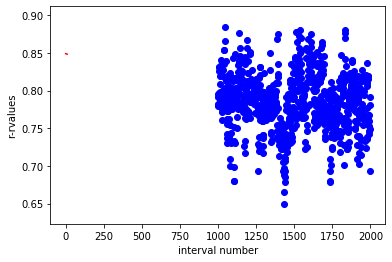

In [178]:
#plotting the polynomial regression
plt.scatter(train.sno, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("interval number")
plt.ylabel("r-rvalues")

In [179]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -120.38
